#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import io

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Read Data

In [2]:
Uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [3]:
Data = pd.read_csv(io.StringIO(Uploaded['USA_Housing.csv'].decode('utf-8')))
Data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
Data.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [5]:
Data.tail(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4990,52723.876555,5.452237,8.124571,6.39,14802.088438,4.795006e+05,"86727 Kelly Plaza\nLake Veronica, IL 04474"
4991,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,"2871 John Lodge\nAmychester, GU 61734-5597"
4992,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06,Unit 2096 Box 9559\nDPO AE 80983-8797
4993,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,"5259 David Causeway Apt. 975\nSouth Alexstad, ..."
4994,73060.846226,5.293682,6.312253,4.16,22695.695480,9.053549e+05,"5224 Lamb Passage\nNancystad, GA 16579"
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [6]:
Data.sample(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
285,82145.369421,6.540968,6.876150,4.23,25736.096055,1.340067e+06,"885 Veronica Stravenue\nWilsonland, FM 77249-8036"
2815,69185.706180,6.418572,8.722698,6.19,50096.980271,1.757396e+06,"2769 Nicole Mews Apt. 063\nNorth Deborahburgh,..."
2684,74419.535645,7.814355,8.469380,3.31,48591.393459,2.019424e+06,"80827 Horn Trafficway\nBennettchester, MP 3545..."
3574,65480.262138,6.945391,6.736076,3.44,34582.970834,1.188761e+06,"PSC 0076, Box 7486\nAPO AP 63047-2610"
3892,66071.925334,6.354552,6.733599,2.27,19935.302674,1.033626e+06,"1029 Warner Mountain\nSouth Danielleville, DE ..."
469,60509.044588,7.126075,8.527952,6.29,28410.303750,1.198314e+06,"PSC 4610, Box 2354\nAPO AP 02895-8370"
3706,68816.870793,5.095805,7.963481,5.22,18444.030683,9.373256e+05,"399 Blanchard Garden Suite 383\nReedhaven, WV ..."
720,74082.022752,6.757648,6.942990,2.44,32617.473473,1.400497e+06,"4120 Jason Path\nLake Rebeccafort, ME 80907-9585"
4530,66537.594868,5.613665,6.598793,3.48,39265.011970,9.854622e+05,"732 Russell Mills Apt. 132\nEast Sharon, CT 86455"
974,62765.294050,7.678891,7.459909,4.08,22272.186038,1.369753e+06,"31651 Hale Walks\nPort Henryfort, UT 45989"


In [9]:
Data.isnull()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


#Data Exploration and Visualization

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [13]:
Data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [15]:
Data['Avg. Area Income'].unique()

array([79545.45857432, 79248.64245483, 61287.06717866, ...,
       63390.6868855 , 68001.33123509, 65510.58180367])

In [18]:
Data['Avg. Area House Age'].unique()

array([5.68286132, 6.00289981, 5.86588984, ..., 7.25059061, 5.53438842,
       5.99230531])

In [19]:
Data['Avg. Area Number of Rooms'].unique()

array([7.00918814, 6.73082102, 8.51272743, ..., 4.80508098, 7.13014386,
       6.7923361 ])

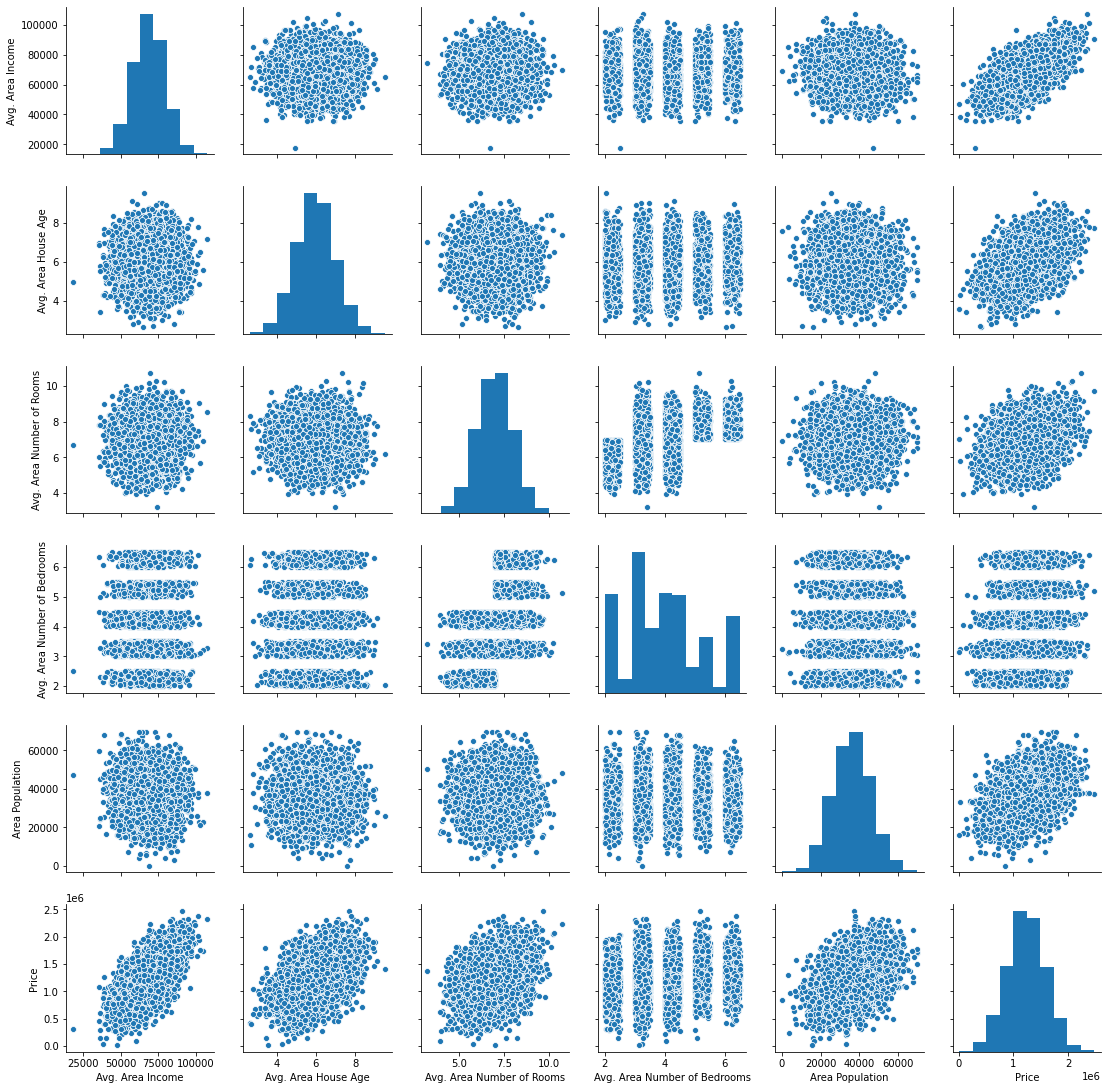

In [22]:
sns.pairplot(Data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']])
plt.show()

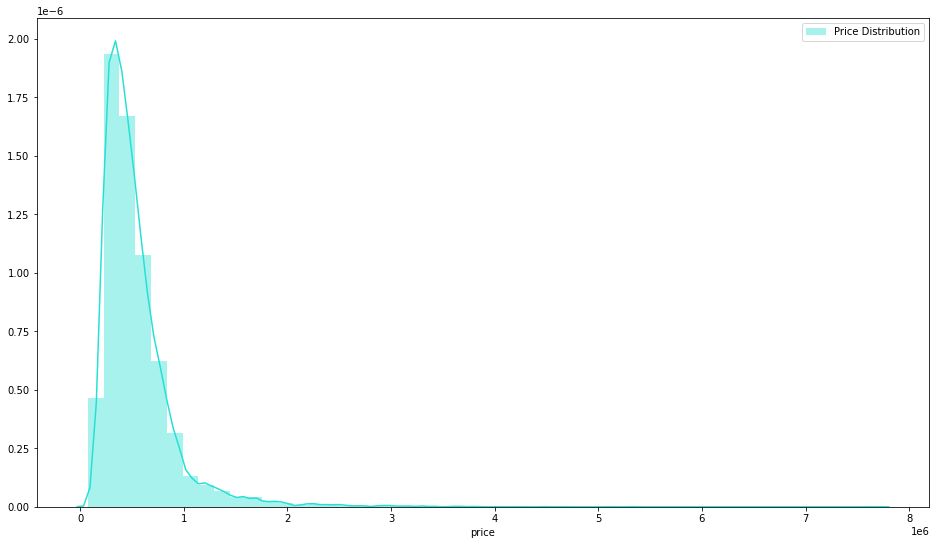

In [0]:
plt.figure(figsize=(16, 9))
sns.distplot(Data['price'],
             color='#26e0d5',
             label='Price Distribution')

plt.legend()
plt.show()

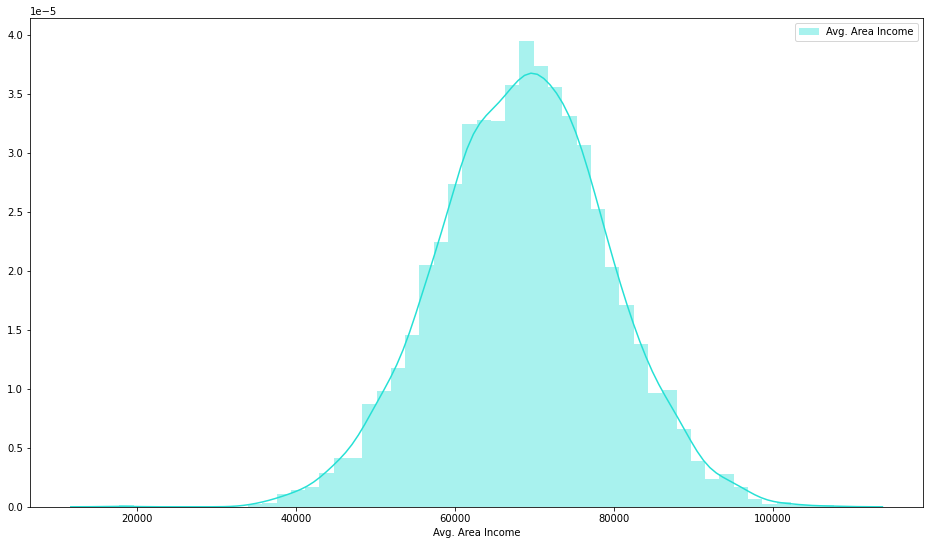

In [23]:
plt.figure(figsize=(16, 9))
sns.distplot(Data['Avg. Area Income'],
             color='#26e0d5',
             label='Avg. Area Income')

plt.legend()
plt.show()

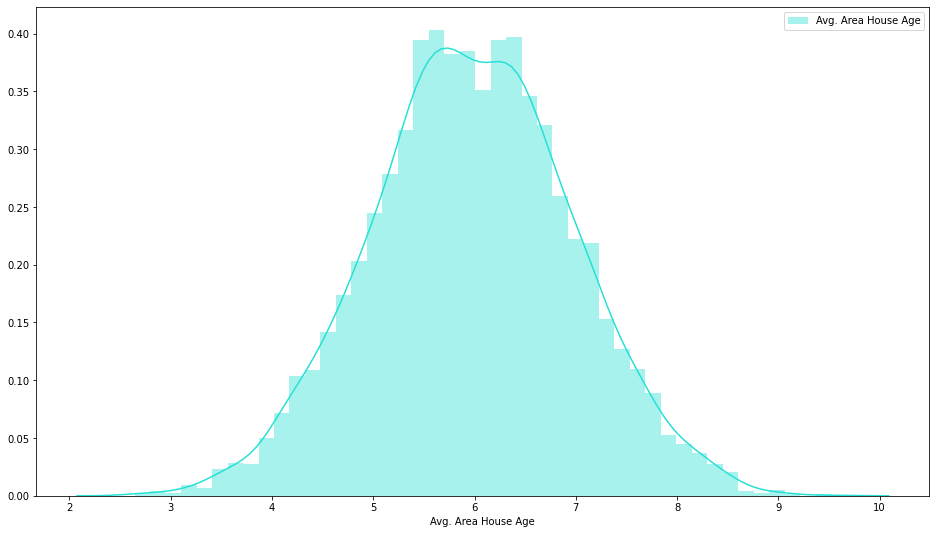

In [24]:
plt.figure(figsize=(16, 9))
sns.distplot(Data['Avg. Area House Age'],
             color='#26e0d5',
             label='Avg. Area House Age')

plt.legend()
plt.show()

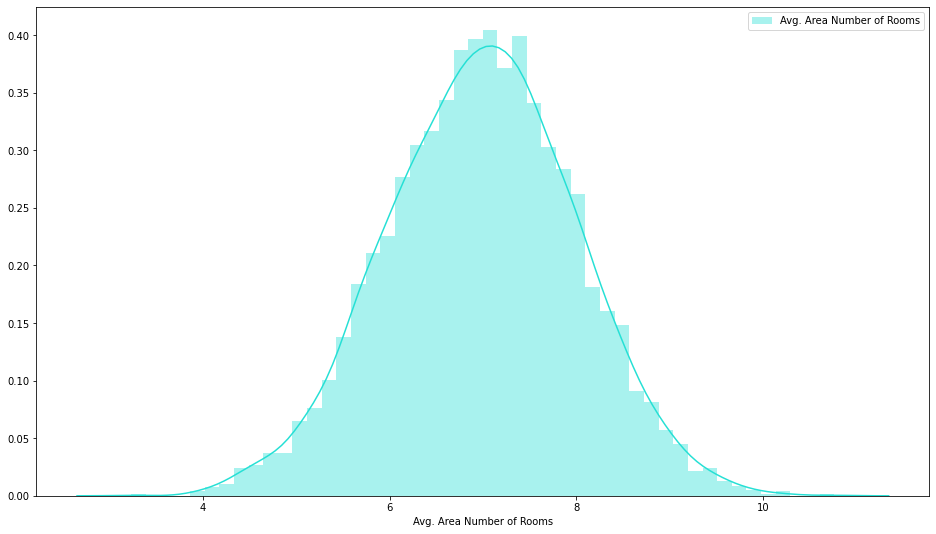

In [25]:
plt.figure(figsize=(16, 9))
sns.distplot(Data['Avg. Area Number of Rooms'],
             color='#26e0d5',
             label='Avg. Area Number of Rooms')

plt.legend()
plt.show()

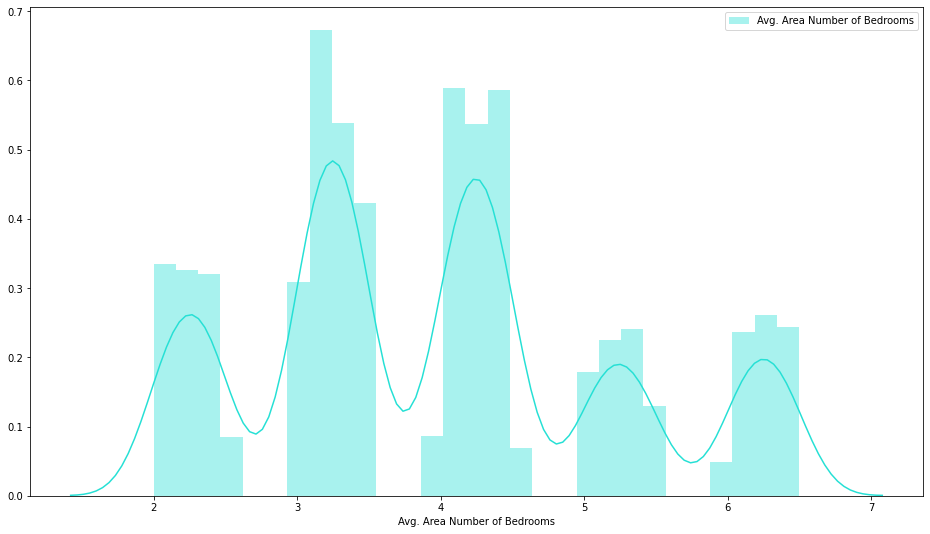

In [26]:
plt.figure(figsize=(16, 9))
sns.distplot(Data['Avg. Area Number of Bedrooms'],
             color='#26e0d5',
             label='Avg. Area Number of Bedrooms')

plt.legend()
plt.show()

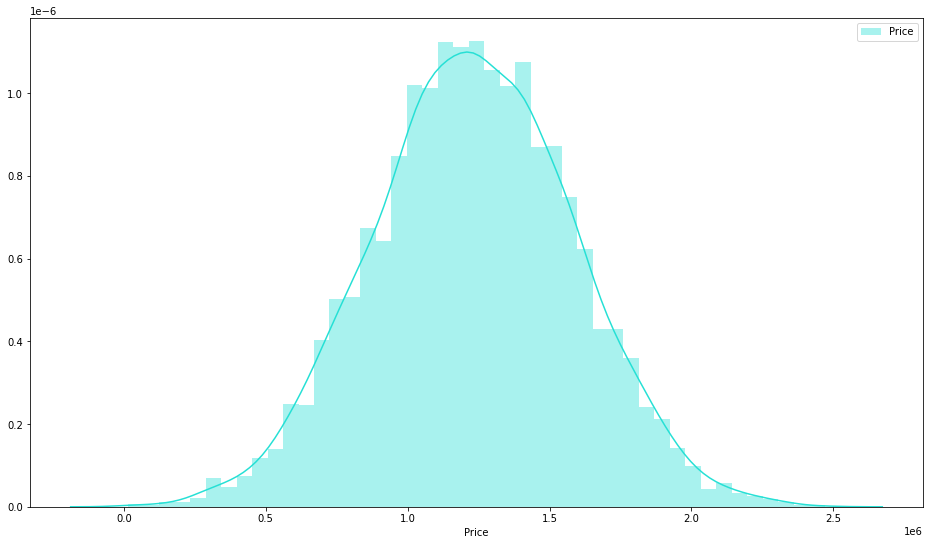

In [28]:
plt.figure(figsize=(16, 9))
sns.distplot(Data['Price'],
             color='#26e0d5',
             label='Price')

plt.legend()
plt.show()

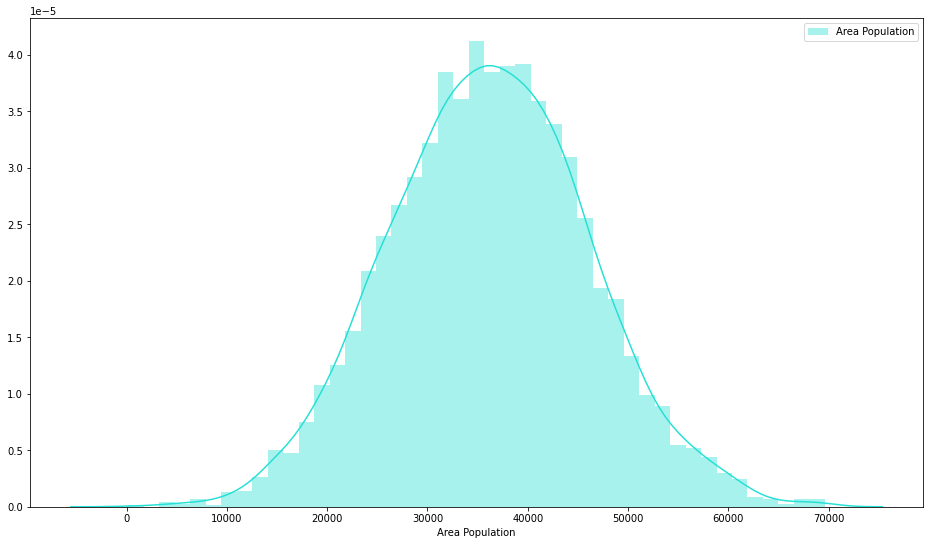

In [0]:
plt.figure(figsize=(16, 9))
sns.distplot(Data['Area Population'],
             color='#26e0d5',
             label='Area Population')

plt.legend()
plt.show()

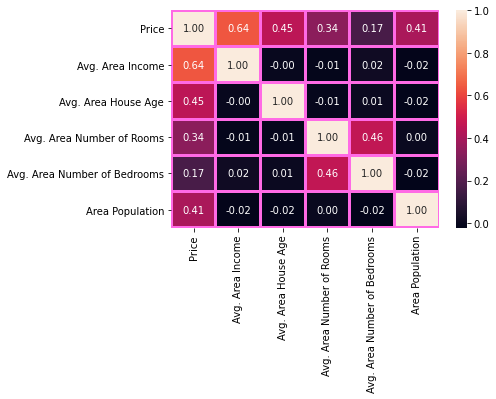

In [30]:
sns.heatmap(Data[['Price', 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']].corr(),
            annot=True,
            fmt='1.2f',
            linewidth=2,
            linecolor='#ff6ae5'
            )
plt.show()

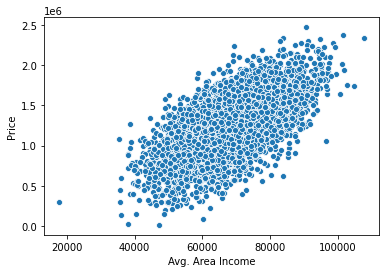

In [32]:
sns.scatterplot(x=Data['Avg. Area Income'],
                y=Data['Price'])
plt.show()

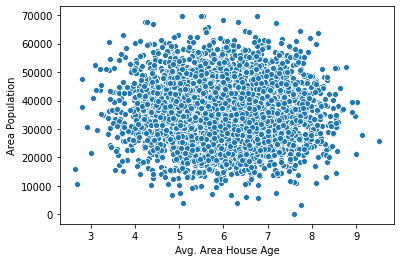

In [33]:
sns.scatterplot(x=Data['Avg. Area House Age'],
                y=Data['Area Population'])
plt.show()

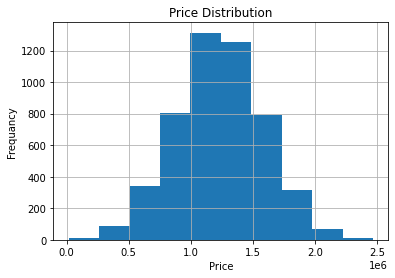

In [38]:
plt.hist(Data['Price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequancy')
plt.grid()
plt.show()

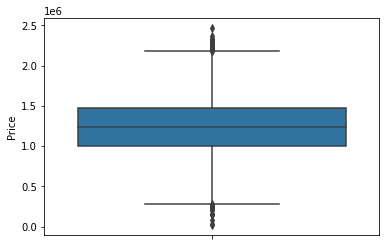

In [41]:
sns.boxplot(y=Data['Price'])
plt.show()

#Create Model

##Data Split

In [0]:
x = Data[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = Data['Price']

In [0]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)

In [44]:
X_Train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4833,61000.160428,6.691542,7.859604,3.47,60697.639241
1218,71172.489061,5.780419,6.102668,4.16,23264.370525
135,74411.059892,5.534628,7.210123,6.44,43537.502946
3612,61685.756042,5.124393,5.604803,3.27,36059.599966
3259,65207.736246,5.997596,8.022923,4.02,29668.101437
...,...,...,...,...,...
4149,76717.097365,5.577625,7.197195,3.11,22276.373067
1890,54447.686052,6.148759,6.077189,2.40,50200.610108
350,81328.807304,6.483153,6.908830,3.01,31231.544403
79,64419.252638,6.954422,8.516160,6.16,39318.170755


In [0]:
# X_Train = np.array(X_Train).reshape(-1, 1)
# X_Test = np.array(X_Test).reshape(-1, 1)
# Y_Train = np.array(Y_Train).reshape(-1, 1)
# Y_Test = np.array(Y_Test).reshape(-1, 1)

##Model Training

In [45]:
lm = LinearRegression()
lm.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lm.coef_

array([2.14377564e+01, 1.66072469e+05, 1.20593183e+05, 1.13679220e+03,
       1.53277084e+01])

In [47]:
lm.intercept_

-2632015.912070264

In [49]:
print('Multiple Regression Equation is Y = a1X1 + a2X2 + a3X3 + ... anXn + b')
print(f'a or slope for each features are {lm.coef_} respectively.')
print(f'b or intercept = {round(lm.intercept_, 2)}')

Multiple Regression Equation is Y = a1X1 + a2X2 + a3X3 + ... anXn + b
a or slope for each features are [2.14377564e+01 1.66072469e+05 1.20593183e+05 1.13679220e+03
 1.53277084e+01] respectively.
b or intercept = -2632015.91


In [50]:
predicted = lm.predict(X_Test)
predicted

array([ 813753.12350162, 1561341.17019261, 1322582.87651332,
       1190215.56639027,  968260.43342425, 1249860.41988961,
       1191758.54894998,  733746.63632261, 1216582.24277216,
       1538401.22872405, 1139814.96707124,  972026.92333076,
        971695.81165353, 1811045.2510579 , 1338458.13230028,
        685127.16328761, 2181177.1251085 ,  929403.99600025,
       1189986.05167935,  807237.28082488,  736250.10725104,
       1438114.15779226, 2048294.99707113, 1534398.33481725,
        703953.08068663, 1444424.72001529, 1922986.49980397,
        801154.79601669, 1676687.47717359, 1022257.07033124,
       1121728.5391664 , 1218410.23685152, 1197062.8239492 ,
       1324414.49805242, 1902202.67112229, 1702270.9537925 ,
       1675888.41209857, 1536171.37540755, 1067886.59298132,
        664346.24043581, 1638403.48598201, 1772556.5889382 ,
       1510281.77111674,  874164.9915709 , 1182172.39735481,
        928413.78224668, 1415593.77229841, 1474509.8387369 ,
       1769678.38360658,

##Compare Predicted with Actual and Error Measurment

In [51]:
metrics.mean_absolute_error(Y_Test,
                            predicted)

81758.98219477001

In [52]:
metrics.mean_squared_error(Y_Test,
                           predicted)

10366319820.242907

In [53]:
np.sqrt(metrics.mean_squared_error(Y_Test,
                           predicted))

101815.12569477536

In [54]:
dict_compare = {'Actual Price': Y_Test.tolist(),
                'Predicted Price': predicted.tolist()}

ComparedModel = pd.DataFrame(dict_compare)
ComparedModel.sample(10)

,Actual Price,Predicted Price
914,1.505561e+06,1.567509e+06
339,1.403219e+06,1.449125e+06
607,9.285638e+05,1.113309e+06
361,1.353182e+06,1.258226e+06
380,7.608760e+05,5.086584e+05
443,1.366001e+06,1.409279e+06
842,1.005844e+06,8.586006e+05
185,1.416966e+06,1.425572e+06
50,1.381118e+06,1.486709e+06
116,1.101341e+06,1.187320e+06


In [55]:
print(y.max())
print(x.max())

2469065.5941747027
Avg. Area Income                107701.748378
Avg. Area House Age                  9.519088
Avg. Area Number of Rooms           10.759588
Avg. Area Number of Bedrooms         6.500000
Area Population                  69621.713378
dtype: float64


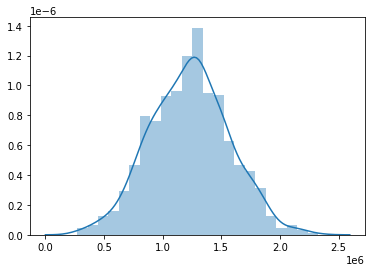

In [57]:
sns.distplot(predicted)
plt.show()

#Prediction

In [58]:
AIncome = int(input('How much average area income?'))
AHouseAge = int(input('How many year in average house age?'))
ANoRooms = int(input('How many average house rooms?'))
ANoBedRooms = int(input('How many average house bed rooms?'))
APop = int(input('How much average area population?'))
DataForPrediction = [[AIncome, AHouseAge, ANoRooms, ANoBedRooms, APop]]
round(lm.predict(np.array(DataForPrediction)).reshape(-1, 1)[0][0], 2)

How much average area income?200000
How many year in average house age?4
How many average house rooms?3
How many average house bed rooms?5
How much average area population?300000


7285601.28

In [59]:
print(f'This house has valued approximately {round(lm.predict(np.array(DataForPrediction)).reshape(-1, 1)[0][0], 2)} USD')

This house has valued approximately 7285601.28 USD
